In [22]:
import numpy as np
import torch.distributions as td
import torch.distributions.transforms as t
from matplotlib import pyplot as plt
import torch
from torch.autograd import Variable
from torch import nn

In [23]:
# define bijector for LeakyReLU
class LeakyReLU(t.Transform):
    
    domain = td.constraints.real
    codomain = td.constraints.real
    bijective = True
    
    def __init__(self, alpha=0.5, validate_args=False, name="leaky_relu"):
        super().__init__(cache_size=0)
        
        self.alpha = nn.Parameter(torch.tensor([float(alpha)]), requires_grad=True)

    def _call(self, x):
        return torch.where(torch.greater_equal(x, 0), x, self.alpha * x)

    def _inverse(self, y):
        return torch.where(torch.greater_equal(y, 0), y, 1. / self.alpha * y)

    def log_abs_det_jacobian(self, y):
        event_dims = y.dim()
        I = torch.ones_like(y)
        J_inv = torch.where(torch.greater_equal(y, 0), I, 1.0 / self.alpha * I)
        # abs is actually redundant here, since this det Jacobian is > 0
        log_abs_det_J_inv = torch.log(torch.abs(J_inv))
        return torch.reduce_sum(log_abs_det_J_inv, axis=event_dims)

In [44]:
a = 0
b = 1

def FlowLayer(n_layers):

    flow = []   
    for i in range(n_layers):
             
        flow.append(LeakyReLU(alpha=1))
        flow.append(td.AffineTransform(loc=0.0, scale=1.0))
    
    return flow

base_distribution = td.Normal(0, 1)
logistic = td.TransformedDistribution(base_distribution, FlowLayer(4))

(array([  8.,  17.,  58., 127., 211., 229., 200.,  93.,  46.,  11.]),
 array([-3.221581  , -2.625252  , -2.028923  , -1.432594  , -0.83626497,
        -0.239936  ,  0.356393  ,  0.952722  ,  1.549051  ,  2.14538   ,
         2.741709  ], dtype=float32),
 <a list of 10 Patch objects>)

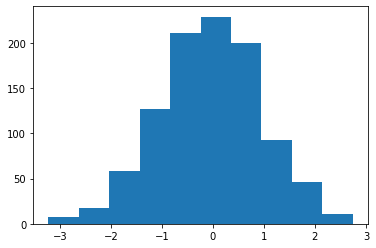

In [45]:
plt.hist(logistic.sample((1000,)))

In [131]:
loss = -tf.reduce_mean(dist.log_prob(x_samples))
train_op = tf.train.AdamOptimizer(1e-3).minimize(loss)
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
NUM_STEPS = int(1e5)
global_step = []
np_losses = []
for i in range(NUM_STEPS):
    _, np_loss = sess.run([train_op, loss])
    if i % 1000 == 0:
        global_step.append(i)
        np_losses.append(np_loss)
    if i % int(1e4) == 0:
        print(i, np_loss)

tensor([0.5000], requires_grad=True)

DependentProperty()